# 맵플롯립 Matplotlib

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

## 지원 되는 플롯 유형

- 선그래프(line plot) : plot()
- 막대그래프(bar chart) : bar()
- 산점도(scatter plot) : scatter() 
- 히스토그램(histogram) : hist()
- 상자그림표(box plot) : boxplot()
- 원그래프(pie chart) : pie()
- 기타 다양한 유형의 차트/플롯을 지원 : 관련 홈페이지 참고
     - https://matplotlib.org/stable/plot_types/index.html

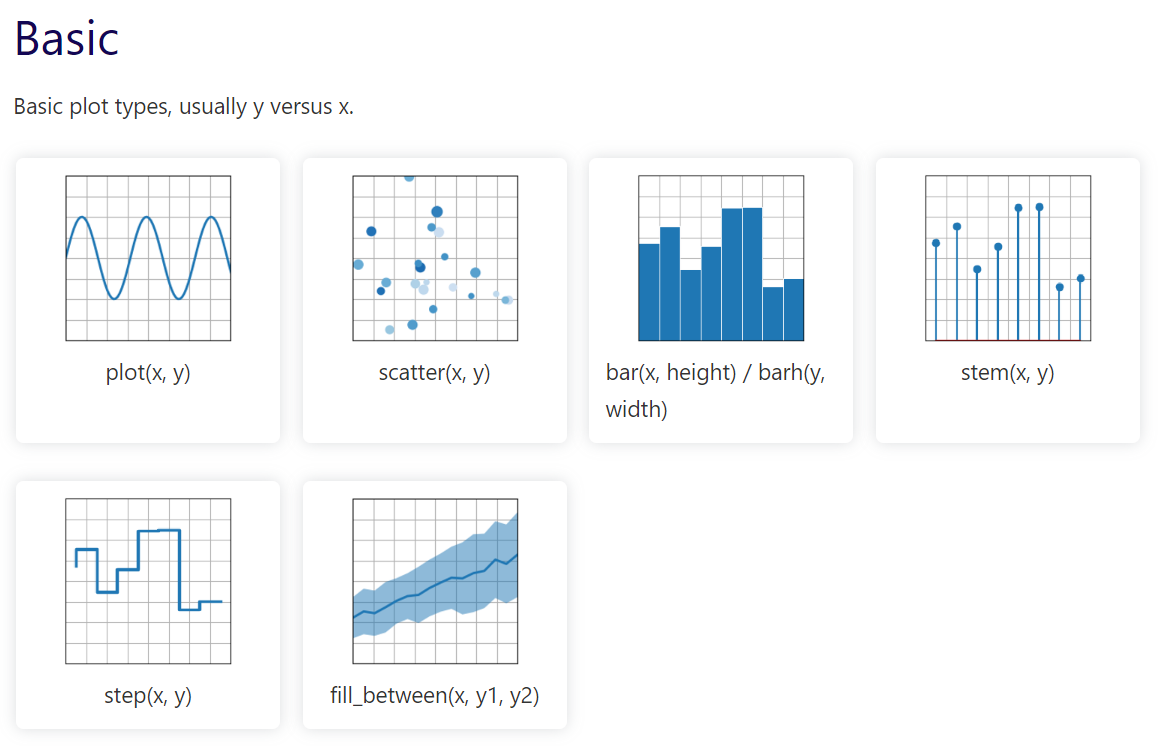
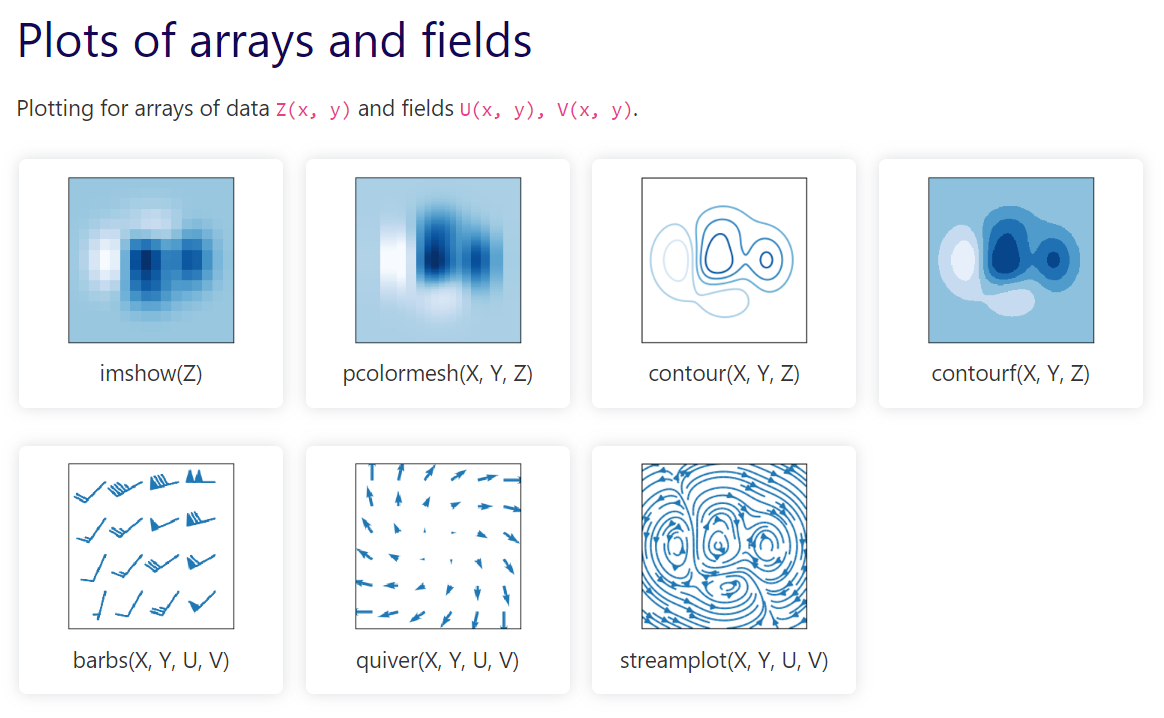
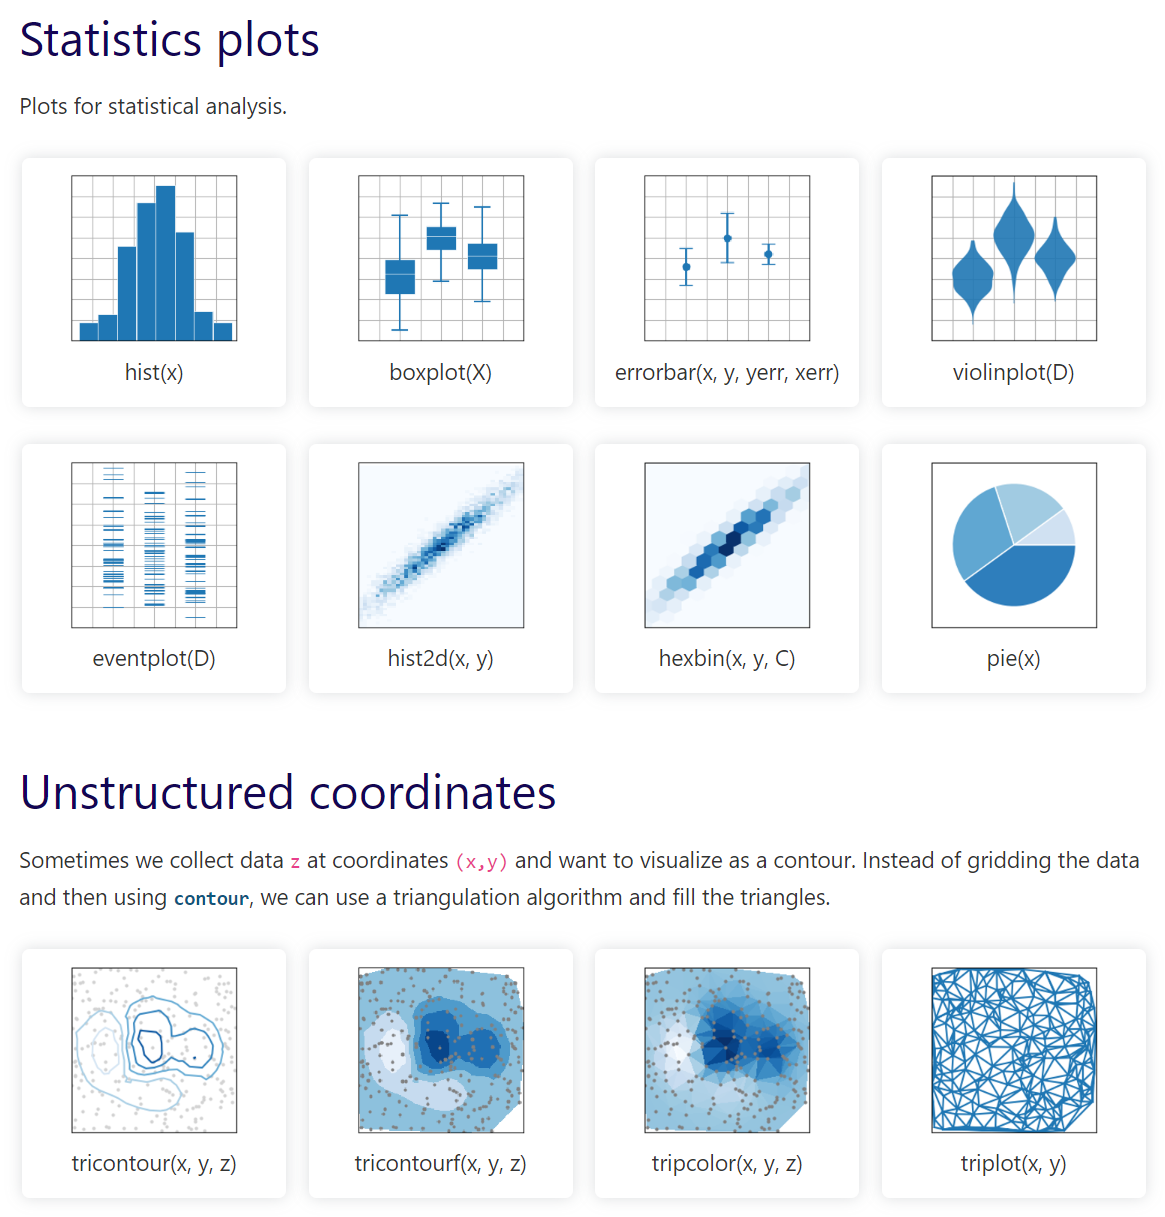

## 1. 막대그래프 : bar(), barh(), df.plot()

### 1-1. 세로 막대 그래프 그리기: bar()
- bar(x,y,color=[],alpha=)
    - color = [] : 색상값 설정
    - alpha = 투명도 설정
    
    https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar

#### 데이터셋

In [26]:
y = [2,3,1,6]
x = np.arange(len(y))

y1 = [2,3]
x1 = [0,1]

y2 = [1,6]
x2 = [2,3]

xlabel=['가','나','다','라']

#### 막대그래프

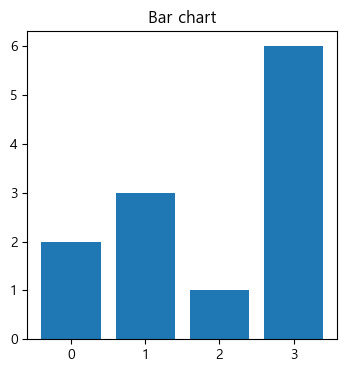

In [10]:
plt.figure(figsize=(4,4))
plt.title('Bar chart')
plt.bar(x,y)
plt.show()

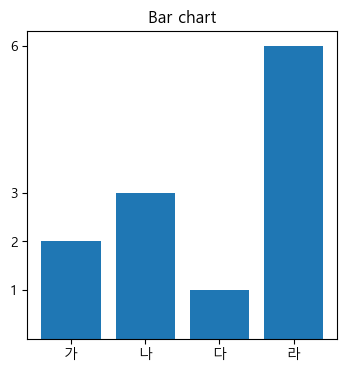

In [11]:
plt.figure(figsize=(4,4))
plt.title('Bar chart')
plt.bar(x,y)
plt.xticks(x, xlabel)
plt.yticks(sorted(y))
plt.show()

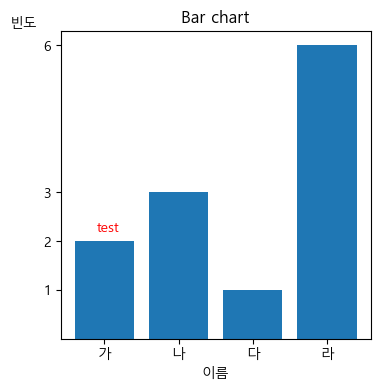

In [20]:
plt.figure(figsize=(4,4))
plt.title('Bar chart')
plt.bar(x,y)
plt.xticks(x, xlabel)
plt.xlabel('이름')
plt.yticks(sorted(y))
plt.ylabel('빈도', rotation=0, loc='top')
plt.text(-0.1, 2.2, 'test', color='r')
plt.show()

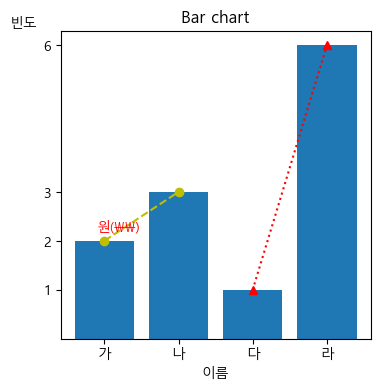

In [29]:
plt.figure(figsize=(4,4))
plt.title('Bar chart')
plt.bar(x,y)
plt.xticks(x, xlabel)
plt.xlabel('이름')
plt.yticks(sorted(y))
plt.ylabel('빈도', rotation=0, loc='top')
plt.text(-0.1, 2.2, r'원(\\)', color='r')

plt.plot(x1,y1, c='y', ls='--', marker='o')
plt.plot(x2,y2, c='r', ls=':', marker='^')

plt.show()

### 1-2. 가로 막대 그래프 그리기 : barh()

- barh(x,y,color=[], alpha=)

#### 데이터셋

In [31]:
np.random.seed(0)
people = ['몽룡','춘향','방자','향단']
x = np.arange(len(people))
sat = 3 + 10*np.random.rand(len(people))

#### 가로막대그래프

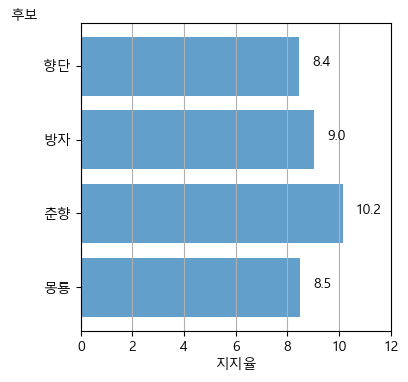

In [45]:
plt.figure(figsize=(4,4))
plt.barh(x, sat, alpha=0.7)
plt.yticks(x, people)
plt.xlim(0,12)
for i in range(len(people)):
    plt.text(sat[i]+0.5 ,i, np.round(sat[i],1))
plt.xlabel('지지율')
plt.ylabel('후보', rotation = 0, loc='top')
plt.grid(axis='x')
plt.show()

### 1-3. 데이터프레임으로 막대그래프 그리기

- **데이터프레임.plot**(kind=그래프종류, grid=T/F, figsize=그래프크기)
- **plt.bar**(데이터프레임.변수1, 데이터프레임.변수2)

**데이터프레임.plot()으로 막대그래프 그리기**

- plt.xticks()의 rotation 인수에 따라 가로형 또는 세로형 막대그래프 생성
    - plt.xticks(ticks=None, labels=None, **kwargs)
    - plt.xticks(ticks=None, labels=None) : vertical 기본
    - plt.xticks(ticks=None, labels=None, rotation='vertical') : 가로형막대
    - plt.xticks(ticks=None, labels=None, rotation='horizontal') : 세로형막대

#### 데이터셋

In [46]:
df = pd.DataFrame({'나이':[15, 20, 17, 50, 2, 30, 23],
                  '이름':['둘리', '도우너','또치','길동','희동','마이콜','영희']})
df

,나이,이름
0,15,둘리
1,20,도우너
2,17,또치
3,50,길동
4,2,희동
5,30,마이콜
6,23,영희


#### 막대그래프

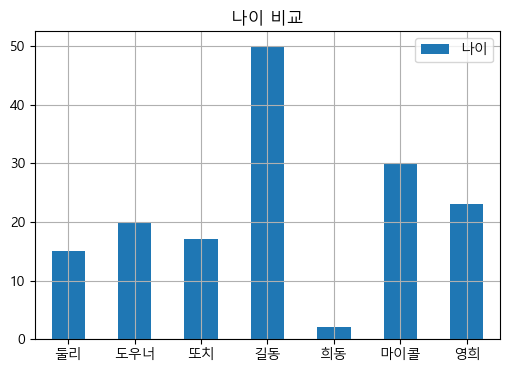

In [54]:
df.plot(kind='bar', grid=True, figsize=(6,4))
plt.xticks(np.arange(df.shape[0]), df.이름, rotation=0)
plt.title('나이 비교')
plt.show()

**데이터프레임.plot()를 이용하여 묶음 막대그래프 그리기**
- 그래프를 그리기 위한 데이터를 지정하지 않는 경우
- 데이터프레임에 있는 모든 수치데이터를 이용하여 묶음 막대그래프를 그림

#### 데이터셋

In [60]:
df = pd.DataFrame({'국어':[150, 200, 170, 150, 120, 130, 200],
                   '영어':[150,130,140,150,100,170,160],
                  '이름':['둘리', '도우너','또치','길동','희동','마이콜','영희']})
df

,국어,영어,이름
0,150,150,둘리
1,200,130,도우너
2,170,140,또치
3,150,150,길동
4,120,100,희동
5,130,170,마이콜
6,200,160,영희


#### 묶음 막대그래프

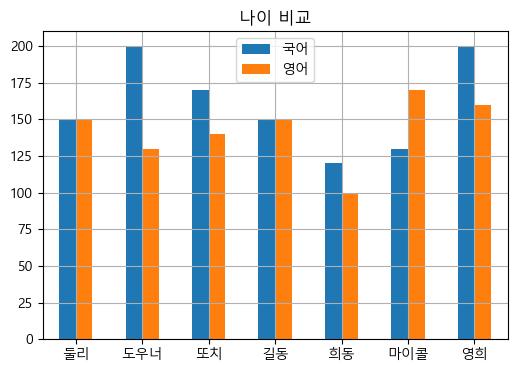

In [61]:
df.plot(kind='bar', grid=True, figsize=(6,4))
plt.xticks(np.arange(df.shape[0]), df.이름, rotation=0)
plt.title('나이 비교')
plt.show()

**plt.bar(데이터프레임)를 이용하여 막대그래프 그리기**

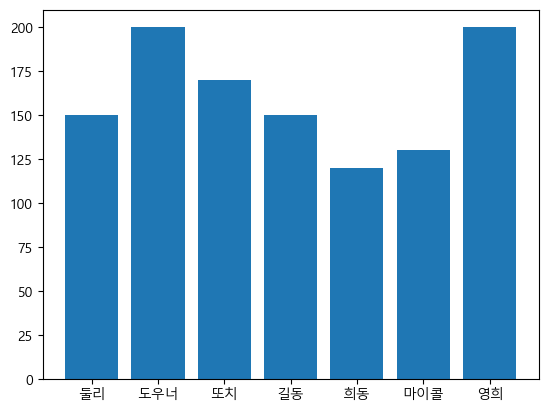

In [62]:
plt.bar(df.이름, df.국어)
plt.show()

**데이터프레임의 일부 필드를 데이터프레임으로 추출하여 그래프 작성**

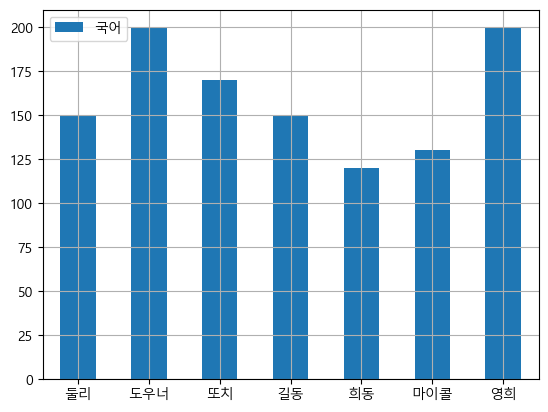

In [71]:
df['국어'].plot(kind='bar')
plt.xticks(np.arange(df.shape[0]), df.이름, rotation=0)
plt.legend()
plt.grid()
plt.show()

**정렬된 데이터를 이용하여 막대그래프 그리기**

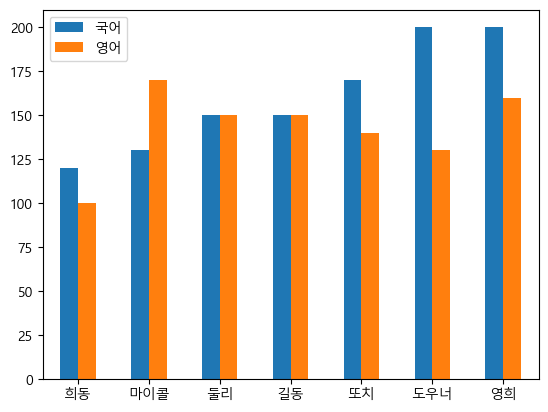

In [75]:
df2 = df.sort_values('국어')
df2

df2.plot(kind='bar')
plt.xticks(np.arange(df2.shape[0]), df2.이름, rotation=0)
plt.show()

## 2. 산점도(scatter plot) : scatter()

- 두 수치형 변수간의 관계를 나타내기 위해 사용하는 그래프
    - 상관관계 표현 : 선형성

In [77]:
x = np.arange(10)
y = np.array([9,8,7,9,8,3,2,4,3,4])

<function matplotlib.pyplot.show(close=None, block=None)>

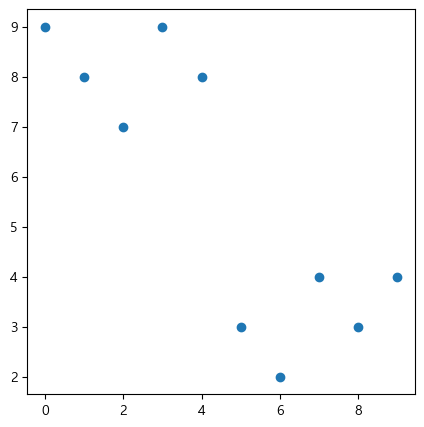

In [78]:
plt.figure(figsize=(5,5))
plt.scatter(x,y)
plt.show()

### 산점도의 marker 변경

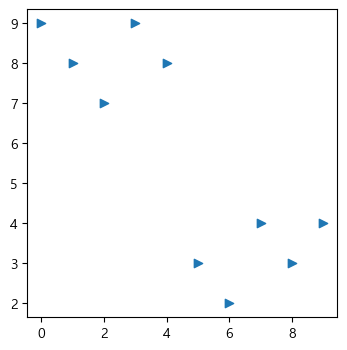

In [79]:
plt.figure(figsize=(4,4))
plt.scatter(x,y,marker='>')
plt.show()

### 버블차트
- 점의 크기와 색상을 이용하여 서로 다른 데이터 값을 표시하는 그래프
- scatter(c, s)를 이용하여 작성
    - s 인수 : size
    - c 인수 : color

In [80]:
n = 30
np.random.seed(0)
x=np.random.rand(n)
y1 = np.random.rand(n)
y2 = np.random.rand(n)
y3 = np.pi*(np.random.rand(n)*15)**2

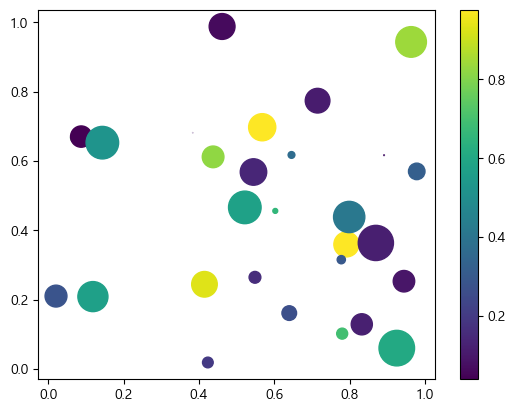

In [87]:
plt.scatter(x,y1,c=y2, s=y3)
plt.colorbar()
plt.show()

### 산점도에 colorbar() 적용

- 산점도를 그린 후 colorbar()를 생성하여 색상 정보를 막대로 표현

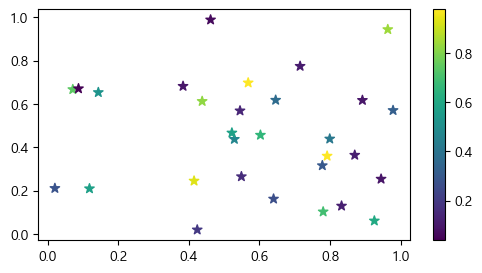

In [86]:
plt.figure(figsize=(6,3))
plt.scatter(x,y1,s=50, c=y2, marker='*')
plt.colorbar()
plt.show()

## 3. 히스토그램 : hist()

- 연속형 수치형 데이터의 분포 시각화
- 참고. 막대그래프는 범주형 데이터의 빈도(비율) 분포 시각화

## 4. 박스플롯 : boxplot()

- 데이터의 분포를 파악해주는 플롯
    - 최소값, 제1사분위수, 중위수, 제3사분위수, 최대값
    
- 이상치 데이터 탐색을 위해 사용

## 5. 파이차트 : pie()

- 범주형 데이터의 빈도(비율)을 비교하기 위해 사용하는 차트
- 원의 형태를 유지할 수 있도록 다음 명령을 실행해야 함
    - plt.axis('equal')
    - 콘솔에서는 별 다른 변화 없으나 plot창에서는 필요함

-----